In [1]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests


os.environ["OPENCV_FFMPEG_READ_ATTEMPTS"]=str(4096*4)

client = OpenAI()

In [5]:
frames = sorted(os.listdir("../EK-Data/P01/rgb_frames/P01_102/"))

In [35]:
from tqdm import tqdm


base64_frames=[]
for frame in tqdm(frames[26:111][::10]):
    buffer = cv2.imread(os.path.join("../EK-Data/P01/rgb_frames/P01_102/",frame))
    _, buffer = cv2.imencode(".jpg", buffer)
    base64_frames.append(base64.b64encode(buffer).decode("utf-8"))
    

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 343.17it/s]


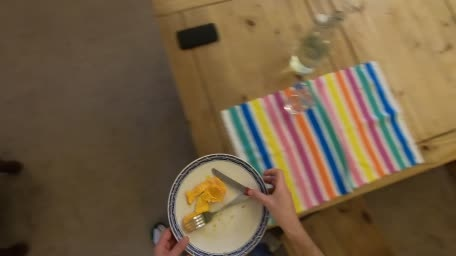

In [36]:
display_handle = display(None, display_id=True)
for img in base64_frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.35)

In [34]:
# This is the intended use case


PROMPT_MESSAGES = [
    {
        "role": "system",
        "content": (
            "You are given the frames of an egocentric video in a home environment setting."
            "The user also provides a brief summary of what could be happening. "
            "Narrate the video with details."
        )
    },
    {
        "role": "user",
        "content": [
            (
                "take knife and plate"
            ),
            *map(lambda x: {"image": x, "resize": 768}, base64_frames),
        ],
    },
]
params = {
    "model": "gpt-4-turbo",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 100,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In this sequence, the person is preparing a meal and organizing a dining setting. They start by carefully placing a piece of food (possibly cheese) onto a plate. The sequence shows the individual repeatedly adjusting the knife and the food on the plate, ensuring everything is neatly arranged. The setting includes a colorful striped place mat on a wooden table, contributing to a casual and homely dining atmosphere. The glasses of water on the table also suggest the meal is intended for more than one person or for ensuring hydration


In [37]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            (
                "These are the frames of a video captured from a headmounted camera. It has a low frame rate. "
                "Please generate a narration describing what is happening."
            ),
            *map(lambda x: {"image": x, "resize": 768}, base64_frames),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    # "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In this sequence of images, we're observing someone from a first-person perspective as they're eating a meal. The scene takes place at a wooden table covered with a colorful striped placemat. The diner has a white plate with a blue rim in front of them, with what appears to be scrambled eggs on it. They're holding a fork in their right hand and using it to interact with the food.

1. The first image shows the fork being brought towards the scrambled eggs.
2. The second image displays the fork piercing into the scrambled eggs.
3. In the third image, the fork has secured a portion of the eggs.
4. The fourth image captures the fork lifting some of the scrambled eggs off the plate.
5. In the fifth image, the fork with the eggs is being held steady, possibly as the person prepares to eat.
6. The sixth image depicts the fork being slightly turned or adjusted, still holding the scrambled eggs.
7. The seventh image shows the fork being moved closer to the diner's mouth, suggesting they're abou

In [28]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            (
                "These are the frames of a POV video captured from a headmounted camera. "
                "Generate a narration describing what is happening. "
                "Don't refer to the images individually. Don't repeat the information included in this instruction."
            ),
            *map(lambda x: {"image": x, "resize": 768}, base64_frames),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 100,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

The person in the video is having a meal at a dining table, using a fork to eat what appears to be a slice of quiche or a similar dish. The plate is resting on a colorful striped placemat, and there's an empty glass to the right with two more glasses and a smartphone lying in the background. Over the course of the meal, the individual cuts into and consumes the food, taking several bites. The environment suggests a casual, home setting and a relaxed, unhurried


In [20]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            (
                "These are the frames of a video captured from a headmounted camera. It has a low frame rate. "
                "Please generate a narration describing what is happening."
            ),
            *map(lambda x: {"image": x, "resize": 768}, base64_frames),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 50,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In the sequence of images, we see a first-person perspective of someone eating a meal, which appears to be an omelette on a plate. The person is seated at a wooden table with a colorful striped placemat. The diner has a fork
